In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point

In [2]:
tornado_df = pd.read_csv('./1950-2018_torn.csv',parse_dates=['date'])

In [3]:
tornado_df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.2,150,2,1,2,189,0,0,0,0
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,3.3,100,2,1,2,119,0,0,0,0
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0


Get the min and max of the latitudes and longitudes

In [7]:
tornado_df.slat.min()

18.13

In [8]:
BBox = (tornado_df.slon.min(), tornado_df.slon.max(), tornado_df.slat.min(), tornado_df.slat.max())

In [9]:
BBox

(-163.53, -64.9, 18.13, 61.02)

In [10]:
us_map = plt.imread('./us_map.png')

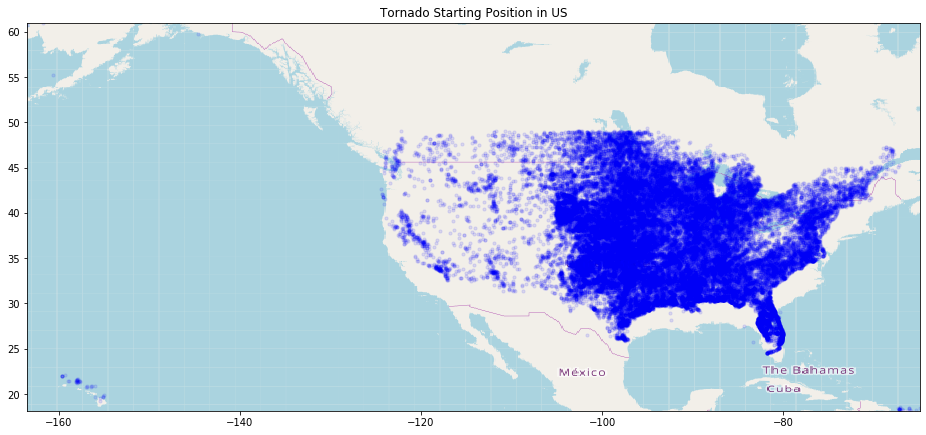

In [14]:
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(tornado_df.slon, tornado_df.slat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Tornado Starting Position in US')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_map, zorder=0, extent = BBox, aspect= 'equal')

In [6]:
import geopandas

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [8]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [9]:
world.name.head()

0                        Fiji
1                    Tanzania
2                   W. Sahara
3                      Canada
4    United States of America
Name: name, dtype: object

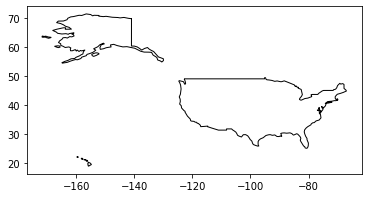

In [10]:
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')

In [12]:
gdf = geopandas.GeoDataFrame(tornado_df, geometry=geopandas.points_from_xy(tornado_df.slon, tornado_df.slat))

In [13]:
gdf.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,150,2,0,1,0,0,0,0,0,POINT (-90.22000 38.77000)
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,150,2,1,2,189,0,0,0,0,POINT (-90.22000 38.77000)
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,100,2,1,2,119,0,0,0,0,POINT (-90.12000 38.82000)
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,130,1,1,1,135,0,0,0,0,POINT (-89.30000 39.10000)
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,10,1,1,1,161,0,0,0,0,POINT (-84.58000 40.88000)


In [68]:
plt.figure(figsize=((16,14)))
gdf.plot(ax=ax, color='red')
plt.show()

<Figure size 1152x1008 with 0 Axes>

In [14]:
usa = geopandas.read_file("./gz_2010_us_040_00_5m.json")
usa.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


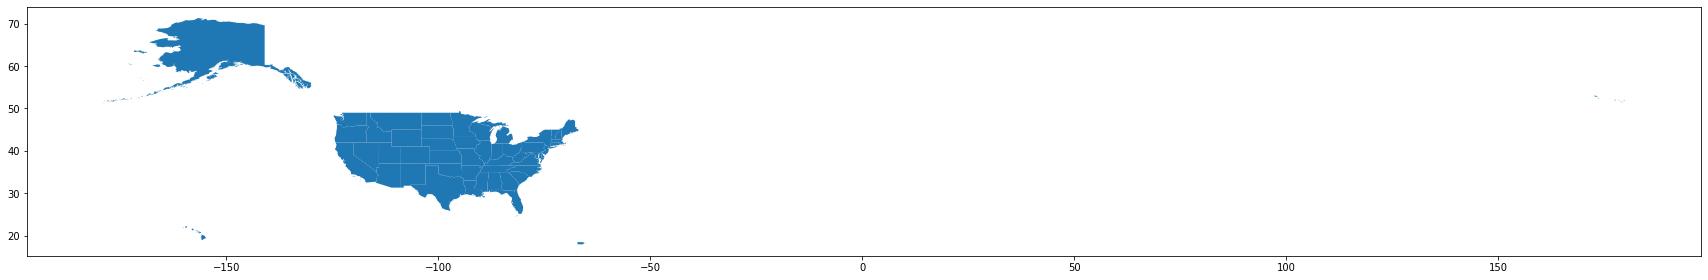

In [15]:
usa.plot(figsize=(30,20))

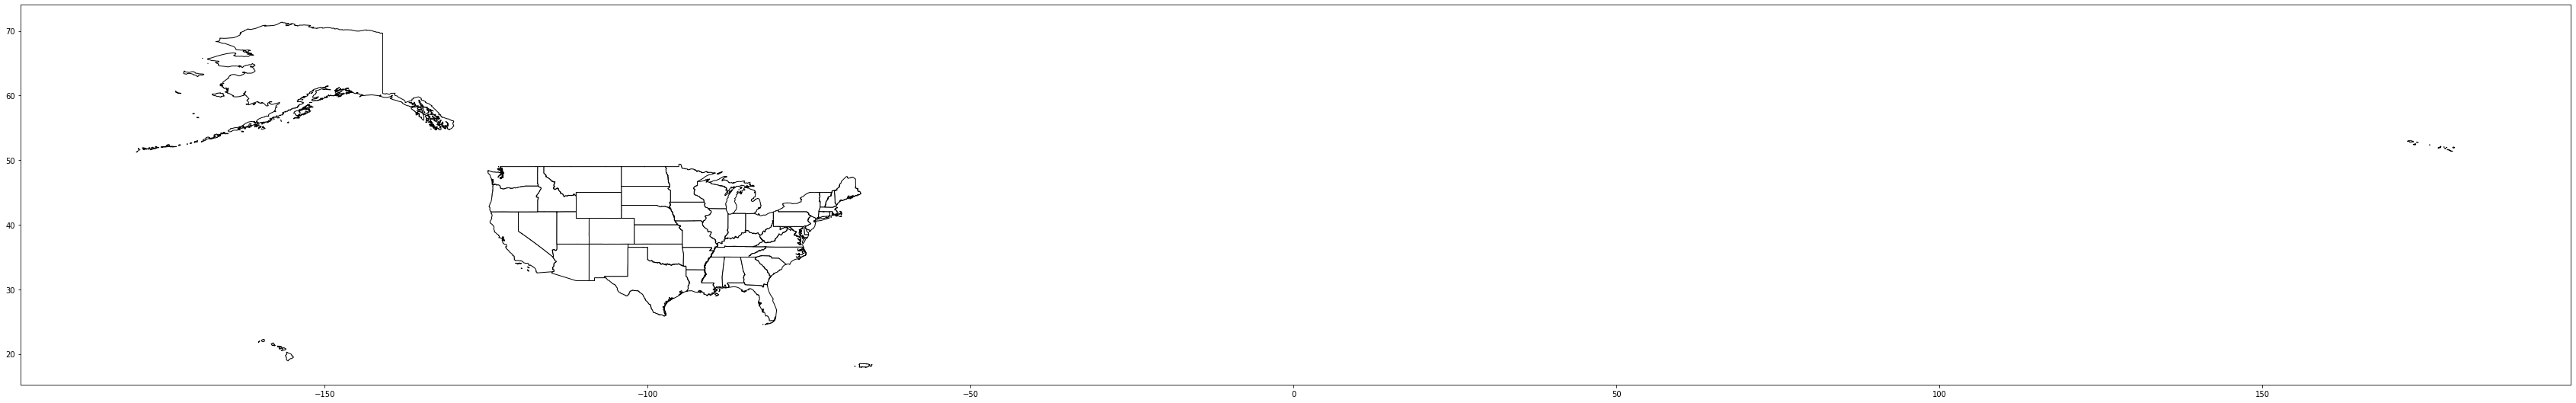

In [16]:
usa.plot(figsize=(60,40), color='white', edgecolor="black")

In [17]:
tornado_df.dtypes

om                   int64
yr                   int64
mo                   int64
dy                   int64
date        datetime64[ns]
time                object
tz                   int64
st                  object
stf                  int64
stn                  int64
mag                  int64
inj                  int64
fat                  int64
loss               float64
closs              float64
slat               float64
slon               float64
elat               float64
elon               float64
len                float64
wid                  int64
ns                   int64
sn                   int64
sg                   int64
f1                   int64
f2                   int64
f3                   int64
f4                   int64
fc                   int64
geometry          geometry
dtype: object

In [18]:
tornado_locations_df = tornado_df.drop(['om','dy','date','time','tz','inj','fat','loss','closs','fc','f1','f2','f3','f4'], axis=1)
tornado_locations_df.head()

,yr,mo,st,stf,stn,mag,slat,slon,elat,elon,len,wid,ns,sn,sg,geometry
0,1950,1,MO,29,1,3,38.77,-90.22,38.83,-90.03,9.5,150,2,0,1,POINT (-90.22000 38.77000)
1,1950,1,MO,29,1,3,38.77,-90.22,38.82,-90.12,6.2,150,2,1,2,POINT (-90.22000 38.77000)
2,1950,1,IL,17,1,3,38.82,-90.12,38.83,-90.03,3.3,100,2,1,2,POINT (-90.12000 38.82000)
3,1950,1,IL,17,2,3,39.10,-89.30,39.12,-89.23,3.6,130,1,1,1,POINT (-89.30000 39.10000)
4,1950,1,OH,39,1,1,40.88,-84.58,0.00,0.00,0.1,10,1,1,1,POINT (-84.58000 40.88000)


In [57]:
type(tornado_locations_df['geometry'])

pandas.core.series.Series

In [19]:
tornado_locations_gdf = geopandas.GeoDataFrame(tornado_locations_df, geometry='geometry')
tornado_locations_gdf.head()

,yr,mo,st,stf,stn,mag,slat,slon,elat,elon,len,wid,ns,sn,sg,geometry
0,1950,1,MO,29,1,3,38.77,-90.22,38.83,-90.03,9.5,150,2,0,1,POINT (-90.22000 38.77000)
1,1950,1,MO,29,1,3,38.77,-90.22,38.82,-90.12,6.2,150,2,1,2,POINT (-90.22000 38.77000)
2,1950,1,IL,17,1,3,38.82,-90.12,38.83,-90.03,3.3,100,2,1,2,POINT (-90.12000 38.82000)
3,1950,1,IL,17,2,3,39.10,-89.30,39.12,-89.23,3.6,130,1,1,1,POINT (-89.30000 39.10000)
4,1950,1,OH,39,1,1,40.88,-84.58,0.00,0.00,0.1,10,1,1,1,POINT (-84.58000 40.88000)


In [59]:
type(tornado_locations_gdf)

geopandas.geodataframe.GeoDataFrame

In [60]:
type(tornado_locations_gdf['geometry'])

geopandas.geoseries.GeoSeries

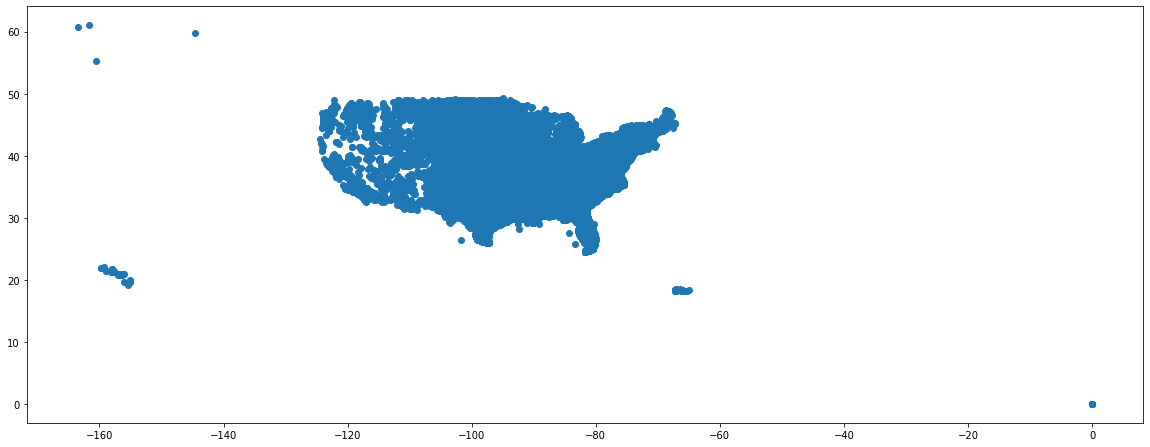

In [20]:
tornado_locations_gdf.plot(figsize=(20,10))

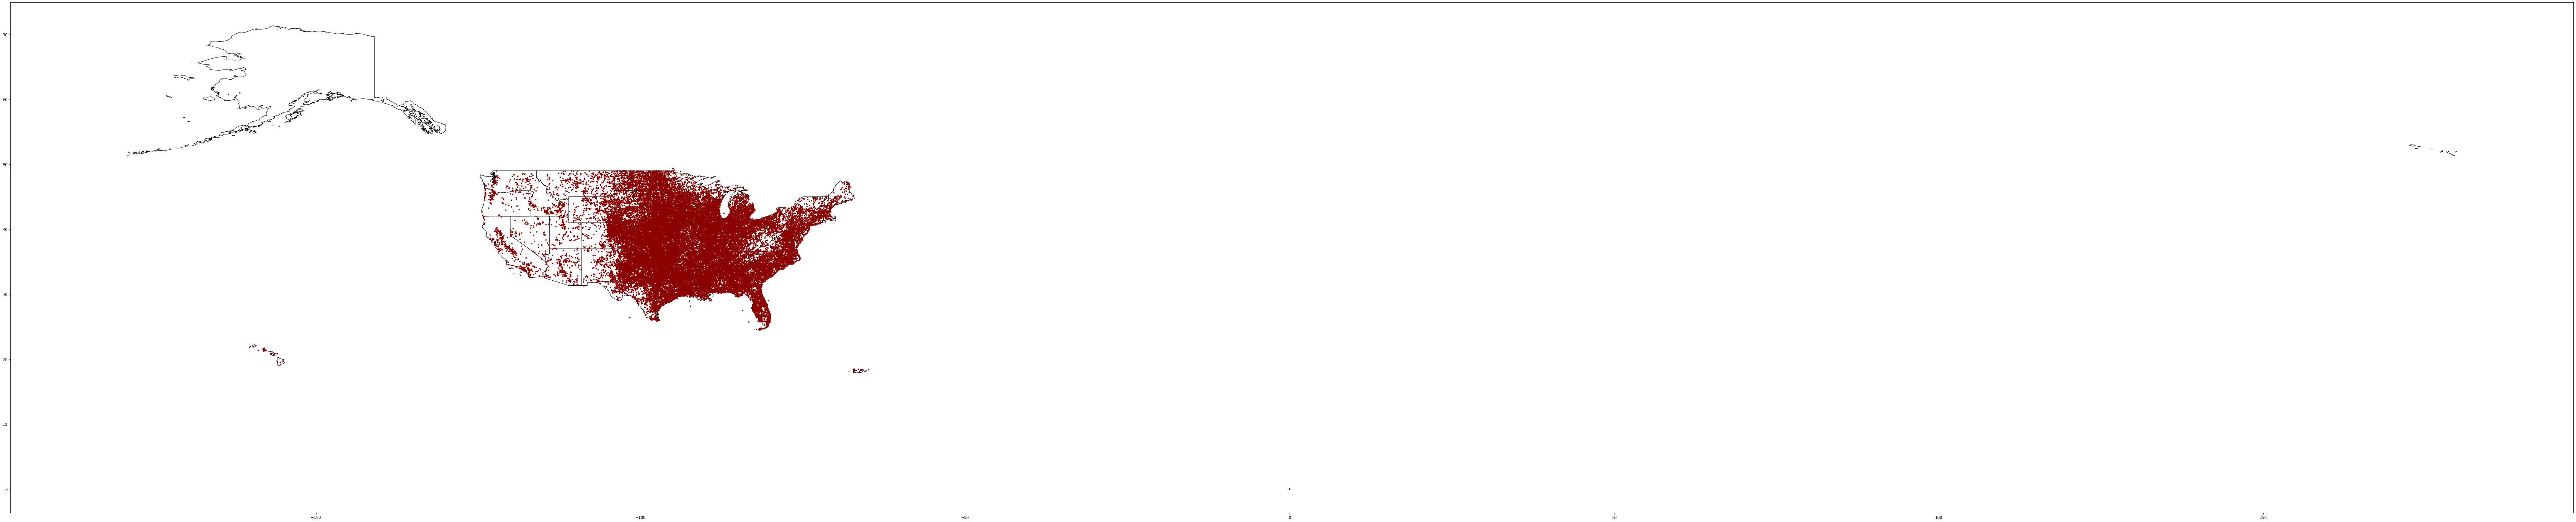

In [21]:
fig, ax = plt.subplots(1, figsize=(120,80))
base = usa.plot(ax=ax, color='white', edgecolor="black")
tornado_locations_gdf.plot(ax=base, color='darkred', marker="*", markersize=10);

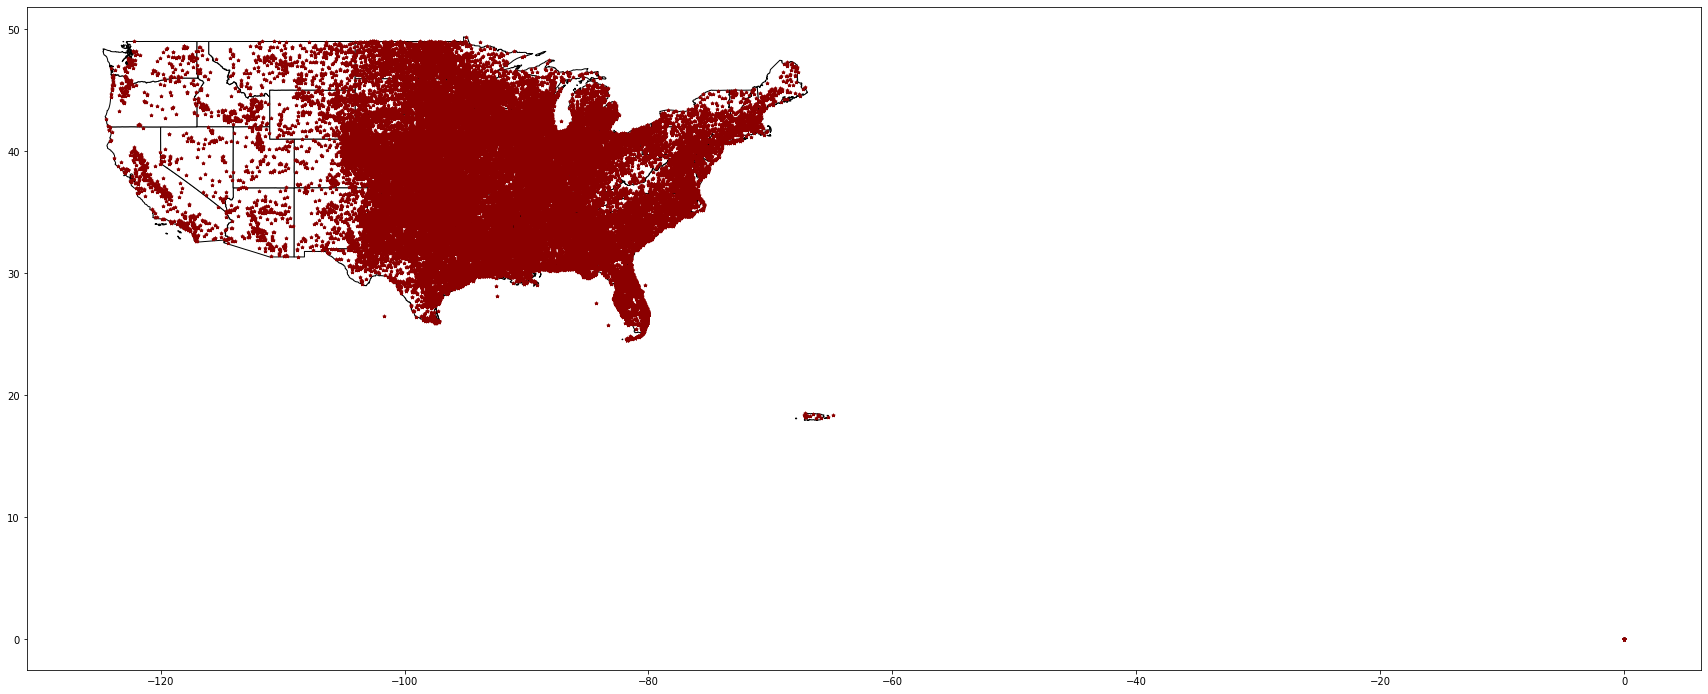

In [27]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = usa[usa['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='white', edgecolor="black")
tornado_locations_gdf.loc[tornado_locations_gdf['st'].isin(['AK','HI']) == False].plot(ax=base, color='darkred', marker="*", markersize=10);

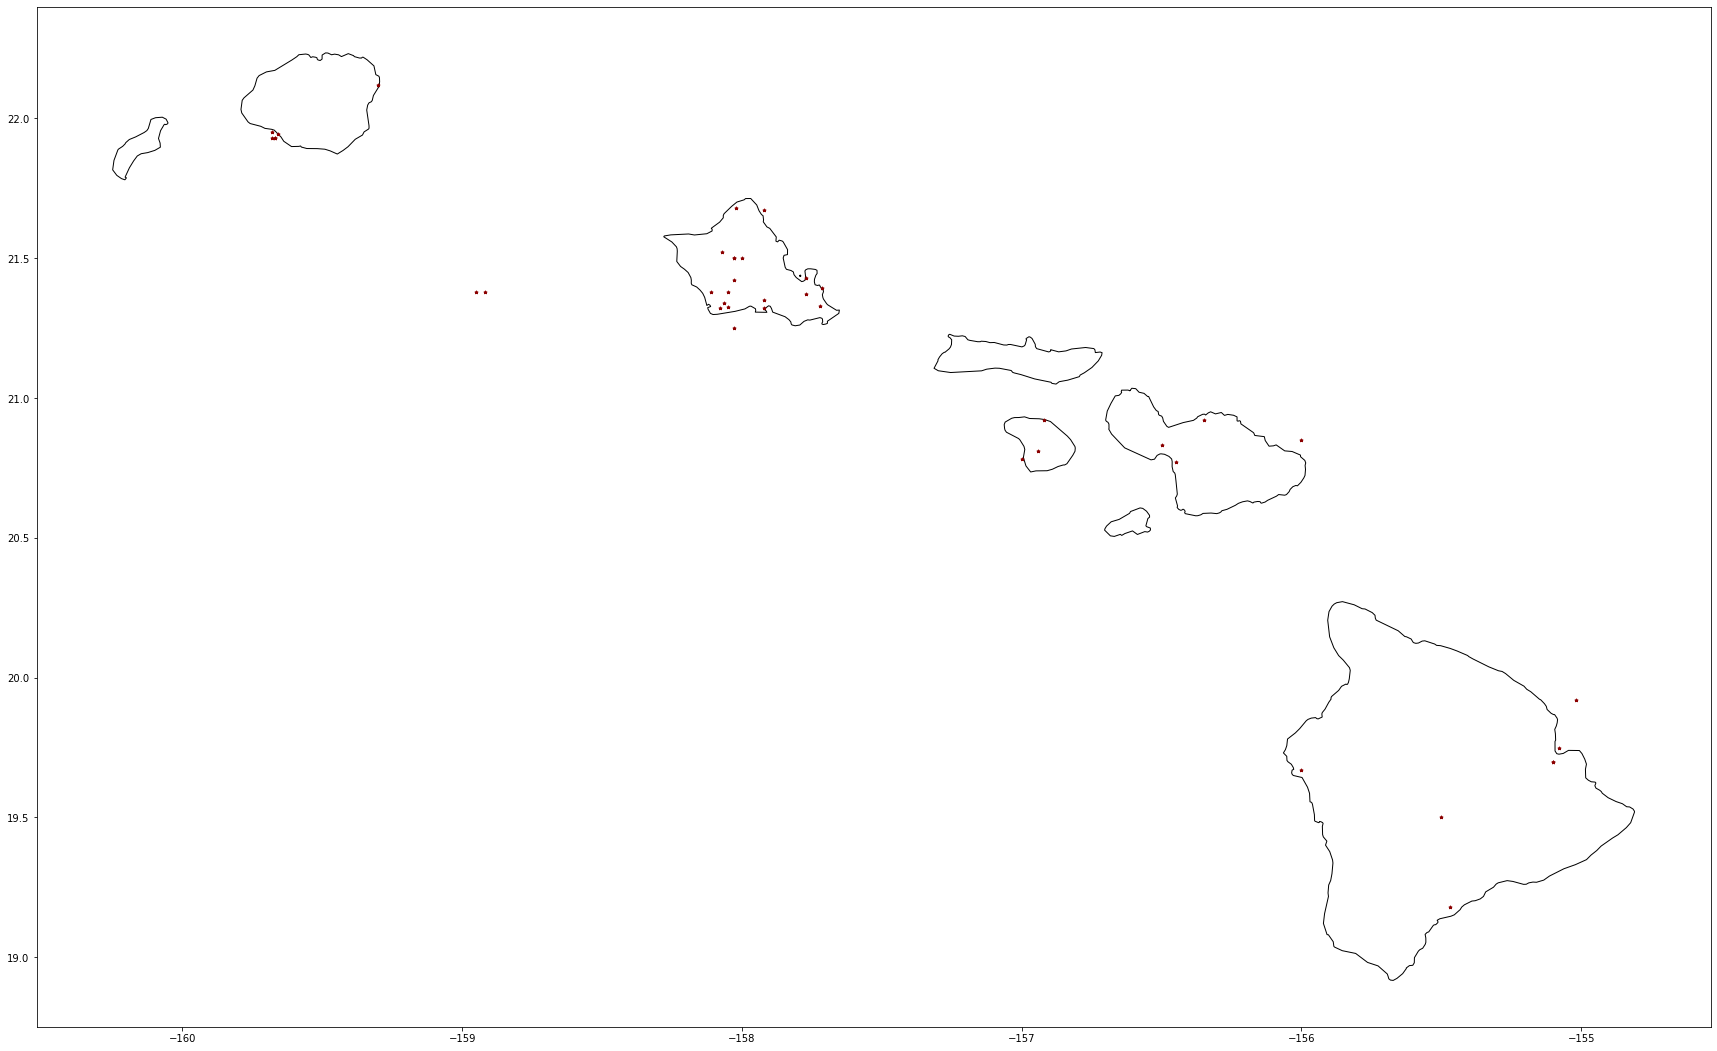

In [29]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = usa[usa['NAME'].isin(['Hawaii'])].plot(ax=ax, color='white', edgecolor="black")
tornado_locations_gdf.loc[tornado_locations_gdf['st'].isin(['HI'])].plot(ax=base, color='darkred', marker="*", markersize=10);

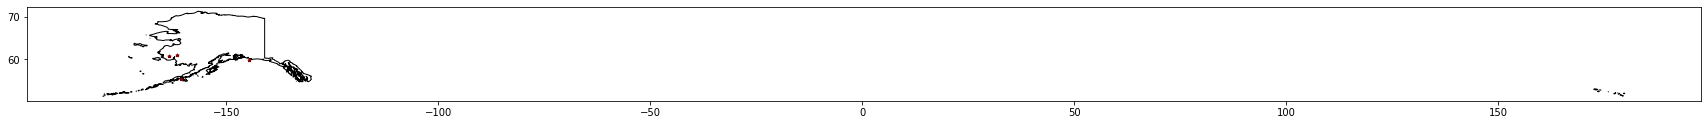

In [30]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = usa[usa['NAME'].isin(['Alaska'])].plot(ax=ax, color='white', edgecolor="black")
tornado_locations_gdf.loc[tornado_locations_gdf['st'].isin(['AK'])].plot(ax=base, color='darkred', marker="*", markersize=10);